In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from pyThermoML.core import DataReport

sns.set_context("talk")


# Analyse ThermoML

### Read in ThermoML xml file

In [2]:
# Read in existing thermoml file
datareport = DataReport().from_xml( open("files/j.jct.2018.07.031.xml","rb") )


### List compounds in the file

In [3]:
# Check exisiting components
ids = datareport.list_compounds()


The datareport contains the following compounds:

   1: choline chloride
   2: glycerol
   3: water


### List the reported properties

In [4]:
# Check all existing properties
prop_list = datareport.get_property_list( verbose = True )

"Electrical conductivity, S/m" of system
"Mass density, kg/m3" of system
"Molar heat capacity at constant pressure, J/K/mol" of system
"Refractive index (Na D-line)" of system
"Speed of sound, m/s" of system
"Surface tension liquid-gas, N/m" of system
"Viscosity, Pa*s" of system


### Gather all reported properties (including variables and constraints)

In [5]:
# Check all existing data
all_data = datareport.get_all_data( verbose = True )

All data saved in the datareport:

   "Mass density, kg/m3" of system                     variable                constraint                                    
                              mean 95_confidence Temperature, K "Pressure, kPa" of system "Mole fraction" of choline chloride
0                          1207.05          2.74         278.15                     100.0                               0.333
1                          1205.60          2.73         280.65                     100.0                               0.333
2                          1204.20          2.73         283.15                     100.0                               0.333
3                          1202.80          2.72         285.65                     100.0                               0.333
4                          1201.40          2.72         288.15                     100.0                               0.333
5                          1200.00          2.72         290.65                    

### Gather data for one property over the composition of one compound and a provided variable

In [6]:
# Extract density data over the composition of choline chloride for different temperatures
density_data = datareport.analysis_property_over_composition( component = "choline chloride",
                                                              prop_name = "Mass density",
                                                              var_name = "Temperature"
                                                            )

### Plot the extracted data

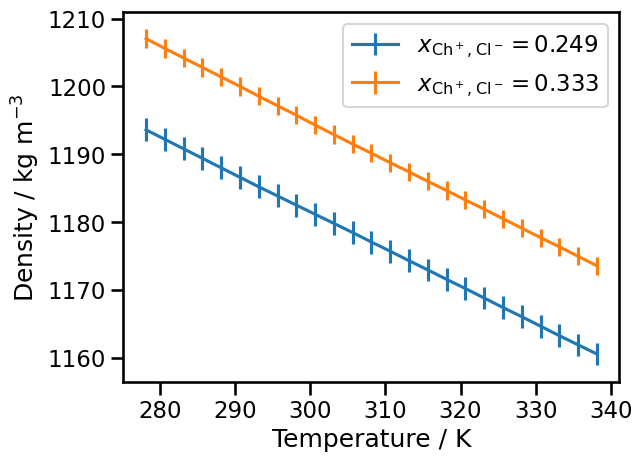

In [7]:
fig, ax = plt.subplots()

for _,df in density_data.groupby("composition"):
    ax.errorbar( df["Temperature"], df["mean"], df["95_confidence"]/2, label=r'$x_\mathrm{Ch^+,Cl^-} =$' + f'{df["composition"].iloc[0]}' )
ax.legend()
ax.set_xlabel("Temperature / K")
ax.set_ylabel("Density / kg m$^{-3}$")
plt.show()